# Plotting functional MRI data in Python
<img style="float: left" img src="images/fmri.png" width="200" >



- Loading functional MRI data
- Sliceing functional MRI data
- Plotting functional MRI data
- Plotting timeseries
-----------------------------------

__Packages__:
- [Matplotlib](https://matplotlib.org/) - a comprehensive library for creating static, animated, and interactive visualizations in Python
- [Nilearn](https://matplotlib.org/) - a library for fast and easy statistical learning on neuroimaging data.
- [Nibabel](https://nipy.org/nibabel/) - a library providing read and write access to some common medical and neuroimaging file formats, including (e.g. NIfTI1)
- [Numpy](https://numpy.org/) - The fundamental package for scientific computing with Python 

In [5]:
# Load libraries

import nibabel as nib
from nilearn import plotting, image
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load data

fmri_path = 'data/sub-01_ses-1_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'
fmri = image.load_img(fmri_path)

In [7]:
# Print dimensions and type of data

dimensions = fmri.shape # get dimensions of the data
data_type = fmri.get_data_dtype() # get the data type

print('Dimensions of fMRI data:', dimensions)
print('Data type of fMRI data:', data_type)

Dimensions of fMRI data: (65, 77, 56, 50)
Data type of fMRI data: int16


In [8]:
# Select one volume (image.index_img) 

volume_1 = image.index_img(fmri, 0)

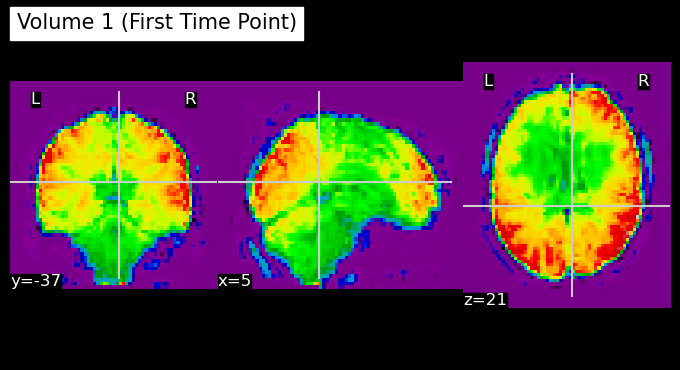

In [9]:
# Make a plot (plotting.plot_epi)

plotting.plot_epi(volume_1, title = "Volume 1 (First Time Point)")

In [10]:
# Convert nibabel file to numpy array (get_data)
fmri_np = fmri.get_fdata()

# Check type and dimensions
data_type_np = fmri_np.dtype
dimensions_np = fmri_np.shape

print('Data type of the converted file is:', data_type_np)
print('Dimensions of the converted file are:', dimensions_np)


Data type of the converted file is: float64
Dimensions of the converted file are: (65, 77, 56, 50)


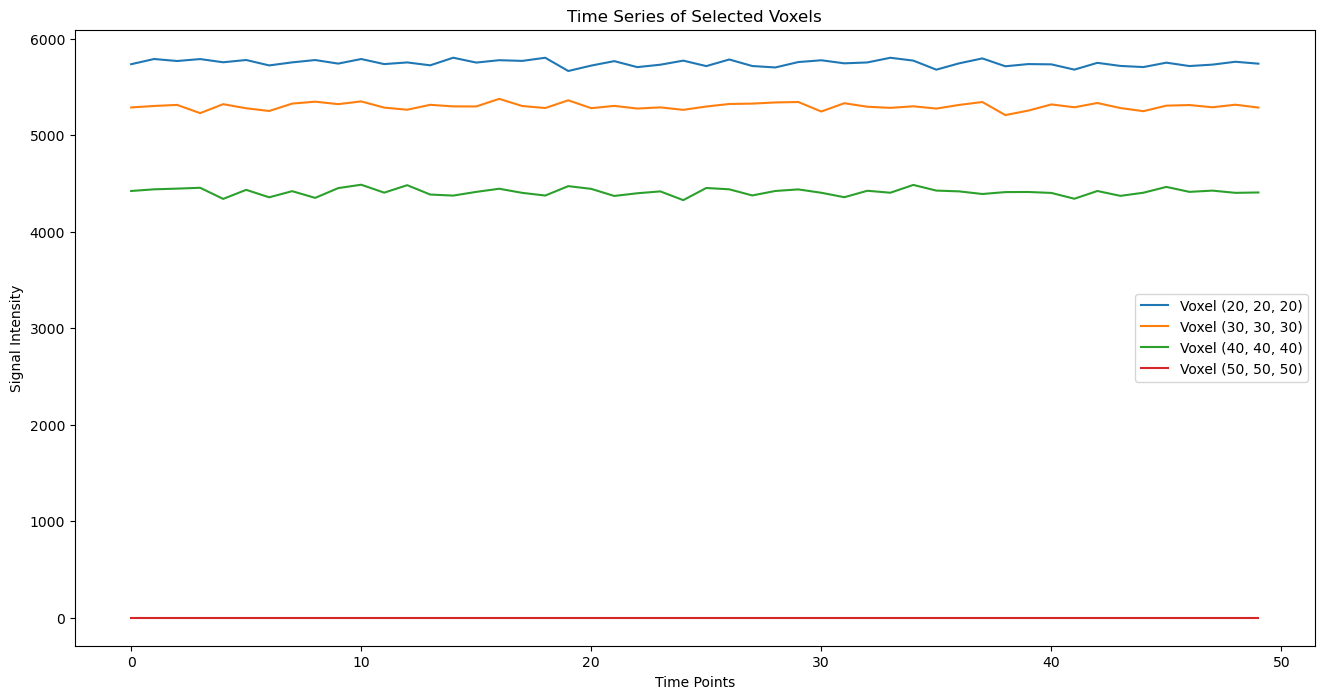

In [11]:
## Plot timeseries of selected voxels

# Define voxel coordinates
time_series = []
voxel_coords = [(20,20,20), (30,30,30), (40,40,40), (50,50,50)] 
for coord in voxel_coords:
    x, y, z = coord
    voxel_time_series = (fmri_np[x,y,z,:])
    time_series.append(voxel_time_series)

# Plot timeseries of selected voxels
plt.figure(figsize=(16,8))
for i, ts in enumerate(time_series):
    plt.plot(ts, label=f'Voxel {voxel_coords[i]}')

plt.xlabel('Time Points')
plt.ylabel('Signal Intensity')
plt.title('Time Series of Selected Voxels')
plt.legend()
plt.show()


In [12]:
# Get metadata of original .nii file
print(fmri.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 4 65 77 56 50  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  3.  3.  3.5 2.  1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 8
cal_max         : 9135.044
cal_min         : -735.5367
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v0.4.1).'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.0
qoffset_y     

In [13]:
## Get TR
# Get the header information
header = fmri.header
# Print TR (Repetition Time)
tr = header.get_zooms()[3] # TR is the fourth element in the zooms tuple
print(f'TR (Repetition Time): {tr} seconds')

TR (Repetition Time): 2.0 seconds


In [17]:
## Generate random timeseries with the length of fMRI data (np.random.uniform (low, high, size=(,))
length_of_fmri_data = dimensions[-1] # calculated earlier
random_time_series = np.random.uniform(low=0, high=50, size=(3))
print(random_time_series)

[12.78406357 39.14268456 25.45916016]


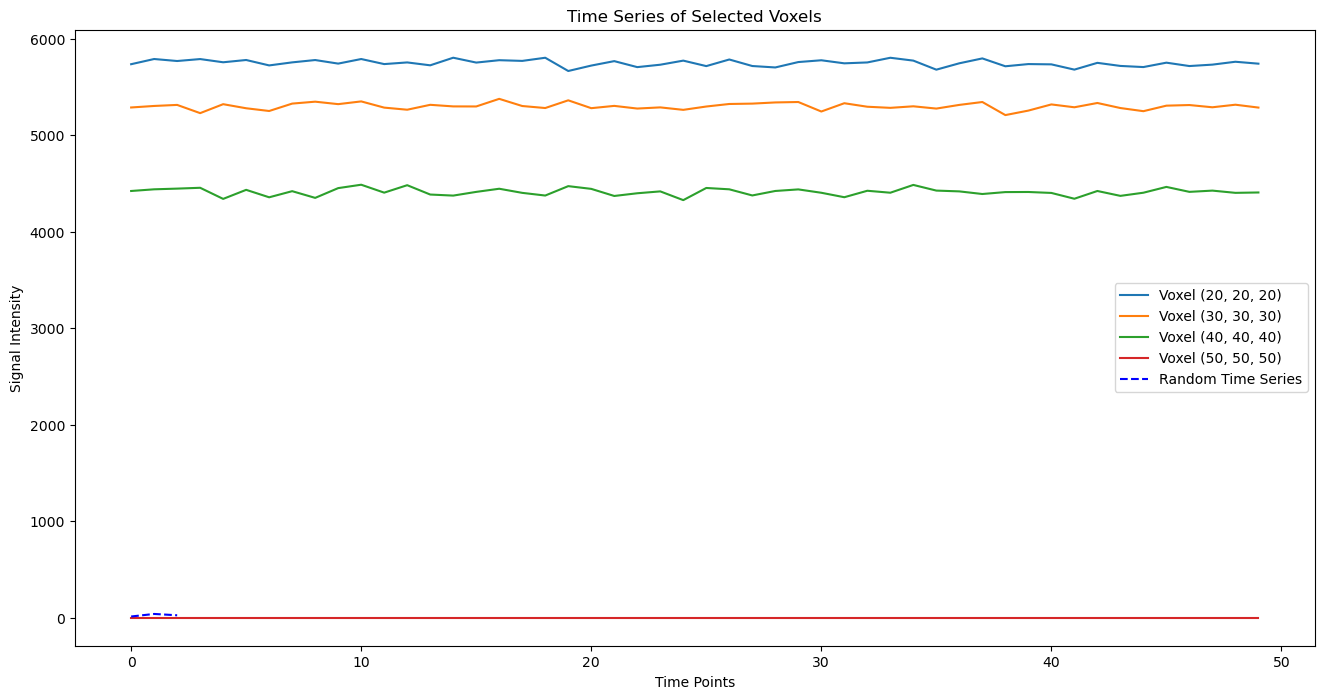

In [18]:
# Plot random timeseries with selected voxel timeseries

time_series = []
voxel_coords = [(20,20,20), (30,30,30), (40,40,40), (50,50,50)] 
for coord in voxel_coords:
    x, y, z = coord
    voxel_time_series = (fmri_np[x,y,z,:])
    time_series.append(voxel_time_series)

# Generate random voxel coordinates within the bounds of fmri_np




    

# Plot timeseries of selected voxels
plt.figure(figsize=(16,8))
for i, ts in enumerate(time_series):
    plt.plot(ts, label=f'Voxel {voxel_coords[i]}')
plt.plot(random_time_series, label='Random Time Series', linestyle='--', color='blue')

plt.xlabel('Time Points')
plt.ylabel('Signal Intensity')
plt.title('Time Series of Selected Voxels')
plt.legend()
plt.show()